Planted motifs (random interval): 2664
Motif indexes (random interval): [30, 63, 90, 126, 156, 202, 237, 264, 301, 334, 365, 415, 464, 510, 544, 571, 609, 638, 667, 708, 755, 793, 824, 864, 894, 922, 972, 1007, 1032, 1062, 1094, 1136, 1179, 1208, 1257, 1307, 1354, 1396, 1444, 1490, 1528, 1570, 1620, 1661, 1697, 1723, 1772, 1810, 1842, 1879, 1913, 1952, 1985, 2014, 2052, 2089, 2135, 2183, 2215, 2251, 2282, 2317, 2350, 2397, 2445, 2470, 2496, 2536, 2562, 2611, 2645, 2670, 2702, 2739, 2770, 2806, 2855, 2882, 2918, 2955, 2990, 3015, 3054, 3104, 3145, 3188, 3230, 3279, 3310, 3342, 3381, 3407, 3454, 3501, 3543, 3588, 3637, 3666, 3708, 3750, 3790, 3839, 3885, 3913, 3961, 3997, 4032, 4058, 4098, 4126, 4162, 4200, 4249, 4283, 4333, 4365, 4415, 4461, 4509, 4543, 4577, 4610, 4636, 4669, 4709, 4756, 4785, 4829, 4857, 4886, 4914, 4952, 5001, 5033, 5078, 5127, 5159, 5208, 5239, 5284, 5327, 5376, 5412, 5444, 5474, 5509, 5556, 5586, 5636, 5665, 5693, 5743, 5780, 5822, 5848, 5874, 5909, 5944, 5978, 601

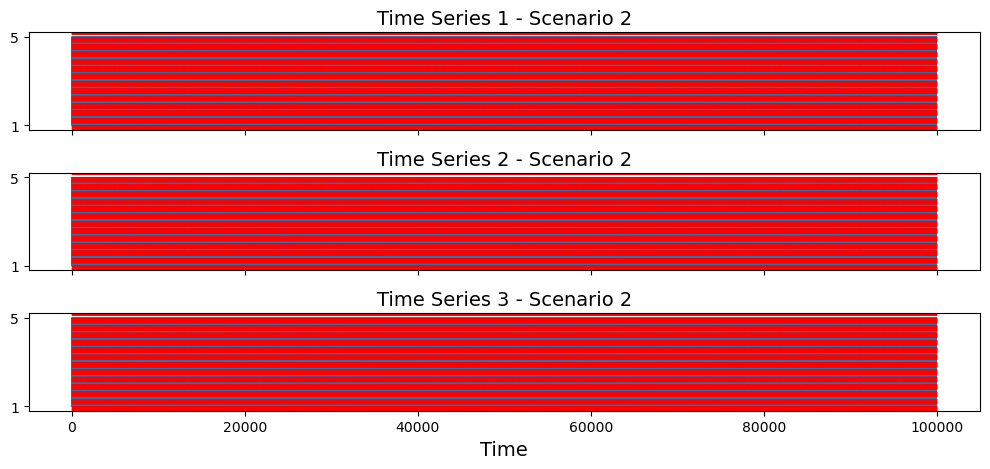

Plot saved for scenario 2.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os


class TimeSeriesMotifGenerator:
    def __init__(self, n=1000, k=3, motif_pattern=[[1, 1, 1, 1, 1]], variables_pattern=None, output_path="../data/syntheticdata/", image_path="../images/"):
        """
        Initialize the generator with the time series length, number of series, motif pattern, and output paths.
        """
        self.n = n
        self.k = k
        self.motif_pattern = motif_pattern
        self.p = len(motif_pattern[0])
        self.variables_pattern = variables_pattern if variables_pattern else list(range(k))
        self.output_path = output_path
        self.image_path = image_path

        os.makedirs(self.image_path, exist_ok=True)
        self.data = np.random.randint(1, 6, (k, n))
        self.motif_indexes_scenario1 = []
        self.motif_indexes_scenario2 = []

    @staticmethod
    def generate_primes_in_range(min_val, max_val):
        """
        Generate prime numbers within a given range.
        """
        primes = []
        for num in range(min_val, max_val + 1):
            if num > 1 and all(num % i != 0 for i in range(2, int(num ** 0.5) + 1)):
                primes.append(num)
        return primes

    def plant_motifs_prime_intervals(self, min_step=5, max_step=50):
        """
        Insert motifs at intervals based on prime numbers within a specified range.
        """
        prime_steps = self.generate_primes_in_range(min_step, max_step)

        index, i = 0, 0
        while index < self.n:
            if index + self.p <= self.n:
                self.motif_indexes_scenario1.append(index)
                for idx_pattern, col in enumerate(self.variables_pattern):
                    self.data[col, index:index + self.p] = self.motif_pattern[idx_pattern]

            step = prime_steps[i % len(prime_steps)]
            index += step + self.p
            i += 1

        print(f"Planted motifs (prime intervals, dynamic range): {len(self.motif_indexes_scenario1)}")
        print("Motif indexes (prime intervals, dynamic range):", self.motif_indexes_scenario1)

    def plant_motifs_random_interval_precursorsignal(
        self, min_step=20, max_step=45, precursor_signal=[5, 5, 5], min_lag_precursor=10, max_lag_precursor=15):
        """
        Insert the motif pattern at random intervals with a precursor signal before each motif.
        """
        # Validate min_step constraint
        min_required_step = len(precursor_signal) + max_lag_precursor
        if min_step < min_required_step:
            raise ValueError(
                f"min_step must be >= {min_required_step} to accommodate the precursor signal and lag range."
            )

        last_index = -self.p
        precursor_signals_indexes = []

        while True:
            # Determine start index for the motif
            index_interval = np.random.randint(min_step, max_step + 1)
            motif_start = last_index + self.p + index_interval

            if motif_start + self.p > self.n:  # Stop if motif exceeds data bounds
                break

            # Calculate precursor signal bounds
            precursor_start = motif_start - np.random.randint(min_lag_precursor, max_lag_precursor + 1)
            precursor_end = precursor_start + len(precursor_signal)

            # Insert precursor signal if within bounds
            if 0 <= precursor_start < self.n and precursor_end <= self.n:
                for col in self.variables_pattern:
                    self.data[col, precursor_start:precursor_end] = precursor_signal
                precursor_signals_indexes.append(precursor_start)

            # Insert motif pattern
            for idx_pattern, col in enumerate(self.variables_pattern):
                self.data[col, motif_start:motif_start + self.p] = self.motif_pattern[idx_pattern]

            # Record the motif index and update last_index
            self.motif_indexes_scenario2.append(motif_start)
            last_index = motif_start

        # Logging planted motifs
        print(f"Planted motifs (random interval): {len(self.motif_indexes_scenario2)}")
        print("Motif indexes (random interval):", self.motif_indexes_scenario2)
        print("Precursor signals at:", precursor_signals_indexes)


    def save_data(self, scenario=1, min_step=None, max_step=None):
        """
        Save the generated data and motif indexes to CSV files.
        """
        os.makedirs(self.output_path, exist_ok=True)

        if scenario == 1:
            filename_suffix = f"min_step={min_step}_max_step={max_step}"
            motif_indexes = self.motif_indexes_scenario1
        elif scenario == 2:
            filename_suffix = f"max_interval={max_step}" if max_step else f"max_interval={self.n // 50}"
            motif_indexes = self.motif_indexes_scenario2

        data_filename = f"{self.output_path}scenario{scenario}_n={self.n}_k={self.k}_p={self.p}_{filename_suffix}_variables={self.variables_pattern}.csv"
        indexes_filename = f"{self.output_path}motif_indexes_scenario{scenario}_n={self.n}_k={self.k}_p={self.p}_{filename_suffix}.csv"

        np.savetxt(data_filename, self.data, delimiter=",", fmt='%.3f')
        np.savetxt(indexes_filename, motif_indexes, delimiter=",", fmt='%d')

        print(f"Data and motif indexes saved for scenario {scenario}.")
        print(f"Data file: {data_filename}")
        print(f"Motif indexes file: {indexes_filename}")

    def plot_data(self, scenario=1):
        """
        Plot the time series data with highlighted motifs.
        """
        fig, axes = plt.subplots(nrows=self.k, ncols=1, figsize=(10, 5), sharex=True)
        motif_indexes = self.motif_indexes_scenario1 if scenario == 1 else self.motif_indexes_scenario2

        for i, ax in enumerate(axes):
            ax.plot(self.data[i], linewidth=0.5)
            ax.set_yticks([1, 5])
            ax.set_title(f"Time Series {i + 1} - Scenario {scenario}", fontsize=14)
            for idx in motif_indexes:
                ax.axvline(x=idx, color='r', linestyle='--', linewidth=1)

        plt.xlabel("Time", fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.savefig(f"{self.image_path}data_synthetic_scenario{scenario}_n={self.n}_k={self.k}_p={self.p}.png")
        plt.show()
        print(f"Plot saved for scenario {scenario}.")

    def generate_and_save(self, scenario=1, min_step=None, max_step=None):
        """
        Generate data, plant motifs, save data, and plot the time series.
        """
        if scenario == 1:
            self.plant_motifs_prime_intervals(min_step=min_step, max_step=max_step)
        elif scenario == 2:
            self.plant_motifs_random_interval_precursorsignal(
                min_step=min_step, max_step=max_step, precursor_signal=[5, 5, 5, 5, 5], min_lag_precursor=13, max_lag_precursor=15
            )
        self.save_data(scenario=scenario, min_step=min_step, max_step=max_step)
        self.plot_data(scenario=scenario)

# Example usage
np.random.seed(0)
# generator = TimeSeriesMotifGenerator(
#     n=100000, k=3, motif_pattern=[[1, 1, 1, 1, 1], [3, 3, 3, 3, 3]], variables_pattern=[0, 2], output_path="../data/syntheticdata/variables=[0,2]/", image_path="../images/"
# )
# generator.generate_and_save(scenario=1, min_step=5, max_step=45)

generator = TimeSeriesMotifGenerator(
    n=100000, k=3, motif_pattern=[[1, 1, 1, 1, 1], [3, 3, 3, 3, 3]], variables_pattern=[0, 2], output_path="../data/syntheticdata/variables=[0,2]/", image_path="../images/"
)
generator.generate_and_save(scenario=2, min_step=20, max_step=45)
